#### `02_pandas3.ipynb`
# 시계열(Time Series) 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False

In [6]:
# 다양한 날짜 형식 데이터 변환 시도.
date_strings = [
    '2025년 8월 6일'
    '2023-01-15',
    '15/01/2023',
    'Jan 15, 2023',
    '2025/08/05', 
    '2023.01.15',
    '15-Jan-2023',
    '20230115',
]

for date in date_strings:
    # 예외 처리 ( 에러 처리 )
    try:    # 일단 아래 블럭 해봐
        parsed = pd.to_datetime(date)
        print(f'{date} -> {parsed}')
    except: # 안 되면 아래 코드 실행
        print('err', date)

# 안 되는 건 안 되는 거고, 그냥 넘어가면 안 될까?

err 2025년 8월 6일2023-01-15
15/01/2023 -> 2023-01-15 00:00:00
Jan 15, 2023 -> 2023-01-15 00:00:00
2025/08/05 -> 2025-08-05 00:00:00
2023.01.15 -> 2023-01-15 00:00:00
15-Jan-2023 -> 2023-01-15 00:00:00
20230115 -> 2023-01-15 00:00:00


In [7]:
# 시계열 인덱스 생성
# 날짜 범위 생성
dates_daily = pd.date_range('2023-01-01', '2023-12-31', freq='D')
dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')
dates_weekly = pd.date_range('2023-01-01', '2023-12-31', freq='W')

print(f"\n일별 날짜 (총 {len(dates_daily)}개): {dates_daily[:5].tolist()}...")
print(f"월별 날짜 (총 {len(dates_monthly)}개): {dates_monthly.tolist()}")
print(f"주별 날짜 (총 {len(dates_weekly)}개): {dates_weekly[:5].tolist()}...")

# 시계열 데이터프레임 생성
np.random.seed(42)

# 일별 매출 데이터 생성
daily_sales = pd.DataFrame({
    'date': dates_daily,
    'sales': np.random.normal(100000, 20000, len(dates_daily)) + 
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 7) * 10000 +  # 주간 패턴
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 365) * 30000   # 연간 패턴
})

# 음수 값 제거
daily_sales['sales'] = daily_sales['sales'].clip(lower=10000)

# date를 인덱스로 설정
daily_sales.set_index('date', inplace=True)

print("\n일별 매출 데이터:")
print(daily_sales.head())


일별 날짜 (총 365개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00')]...
월별 날짜 (총 12개): [Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-31 00:00:00')]
주별 날짜 (총 53개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-29 00:00:00')]...

일별 매출 데이터:
                    sales
date                     
2023-01-01  109934.283060
2023-01-02  105569.429486
2023-01-03  123735.698233
2023-01-04  136348.024536
2023-01-05   93042.167918


/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_46124/2779952191.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')


In [22]:
# Index(datetime index라서 바로 접근)

# 
daily_sales['year'] = daily_sales.index.year    # 년
daily_sales['month'] = daily_sales.index.month  # 월
daily_sales['day'] = daily_sales.index.day  # 일
daily_sales['weekday'] = daily_sales.index.weekday  # 요일, 월 = 0
daily_sales['weekname'] = daily_sales.index.day_name()  # 요일, 얘만 함수
daily_sales['quarter'] = daily_sales.index.quarter  # 분기


daily_sales.head()

# 요일별 평균매출
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['weekname'] = pd.Categorical(daily_sales['weekname'], categories=day_order, ordered=True)
daily_sales.groupby('weekname')['sales'].mean().reset_index().round(2)

# 순서 맞추는 법 쌤이 알려주심
weekday_avg = daily_sales.groupby('weekname')['sales'].mean() #.reset_index().round(2)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg.reindex(weekday_order)

/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_46124/3134091620.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_sales.groupby('weekname')['sales'].mean().reset_index().round(2)
/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_46124/3134091620.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = daily_sales.groupby('weekname')['sales'].mean() #.reset_index().round(2)


weekname
Monday       110880.597234
Tuesday      106714.372057
Wednesday    105589.634707
Thursday      94395.578165
Friday        90878.737427
Saturday      94273.760423
Sunday        98688.856141
Name: sales, dtype: float64

/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_46124/3521580353.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_mean = daily_sales.groupby('weekname')['sales'] \


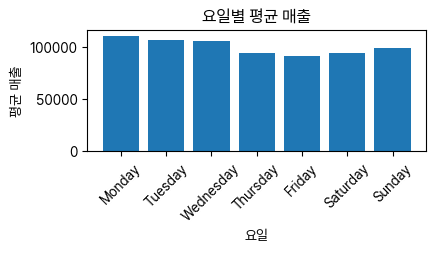

In [27]:
# 1) 그룹 연산 및 결과 저장
weekly_mean = daily_sales.groupby('weekname')['sales'] \
    .mean() \
    .reset_index() \
    .round(2)

# 2) 플롯 생성
plt.figure(figsize=(8, 4))   # 사이즈 지정
plt.subplot(2, 2, 1)    # 부그래프 위치 설정
plt.bar(weekly_mean['weekname'], weekly_mean['sales'])

# 3) 라벨 및 제목 설정
plt.xlabel('요일')
plt.ylabel('평균 매출')
plt.title('요일별 평균 매출')

# 4) x축 눈금 회전(필요 시)
plt.xticks(rotation=45)

# 5) 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

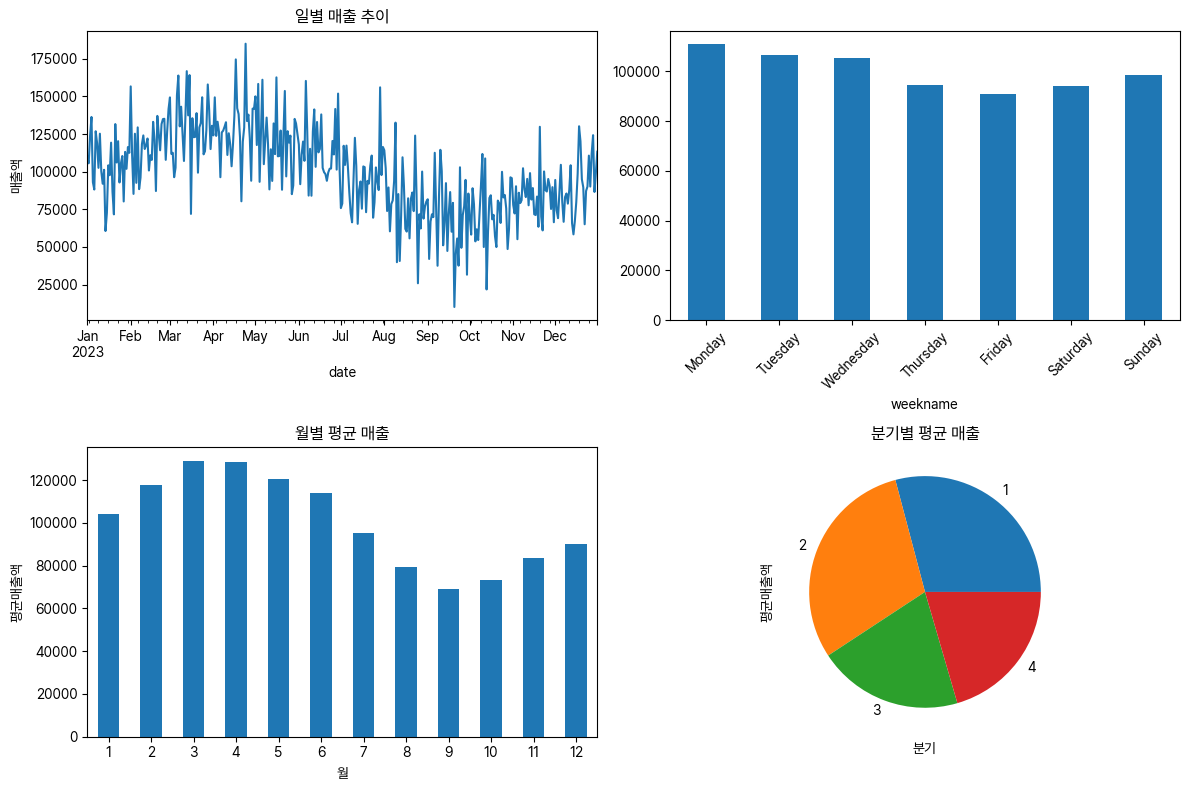

In [48]:
# 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
daily_sales['sales'].plot()
plt.title('일별 매출 추이')
plt.ylabel('매출액')

plt.subplot(2, 2, 2)
weekday_avg.plot(kind='bar')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
monthly_avg = daily_sales.groupby('month')['sales'].mean()
monthly_avg.plot(kind='bar')
plt.title('월별 평균 매출')
plt.xlabel('월')
plt.ylabel('평균매출액')
plt.xticks(rotation=0)

plt.subplot(2, 2, 4)
quarter_avg = daily_sales.groupby('quarter')['sales'].mean()
quarter_avg.plot(kind='pie')
plt.title('분기별 평균 매출')
plt.xlabel('분기')
plt.ylabel('평균매출액')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [51]:
# 인덱싱 및 슬라이싱
f'전체 데이터 기간, {daily_sales.index.min()} ~ {daily_sales.index.max()}'

'전체 데이터 기간, 2023-01-01 00:00:00 ~ 2023-12-31 00:00:00'

In [54]:
# 특정 날짜 선택
d1 = daily_sales.loc['2023-01-15']
d1['sales']

np.float64(72661.82632991784)

In [58]:
# 날짜 범위 선택(슬라이싱 동일하게)
jan = daily_sales.loc['2023-01-01': '2023-01-31']
len(jan), jan['sales'].sum()

(31, np.float64(3227318.9969505323))

In [ ]:
# 부분 문자열 활용
daily_sales.loc['2023-04']  # 이러면 4월만 뽑힘
daily_sales.loc['2023-04-0']    # 얘는 안 됨.

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-04-01,124116.291222,2023,4,1,5,Saturday,2
2023-04-02,149372.622003,2023,4,2,6,Sunday,2
2023-04-03,123774.752707,2023,4,3,0,Monday,2
2023-04-04,133182.424610,2023,4,4,1,Tuesday,2
2023-04-05,126463.065796,2023,4,5,2,Wednesday,2
2023-04-06,96328.378472,2023,4,6,3,Thursday,2
2023-04-07,126072.893472,2023,4,7,4,Friday,2
2023-04-08,127255.949952,2023,4,8,5,Saturday,2
2023-04-09,129899.974611,2023,4,9,6,Sunday,2


In [ ]:
# 조건부 필터링(걍 dataframe이랑 똑같네)
daily_sales[daily_sales['weekname'] == 'Friday']

# 6월의 주말만 선택

# 6월 데이터만 뽑기
june = daily_sales.loc['2023-06']

# 주말 데이터 마스크
weekend_mask = june['weekname'].isin(['Saturday', 'Sunday'])   # 주말에 True인 마스크

june[weekend_mask]

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-06-03,111414.940332,2023,6,3,5,Saturday,2
2023-06-04,119996.234696,2023,6,4,6,Sunday,2
2023-06-10,84019.290727,2023,6,10,5,Saturday,2
2023-06-11,126593.103997,2023,6,11,6,Sunday,2
2023-06-17,138027.509610,2023,6,17,5,Saturday,2
2023-06-18,102502.903094,2023,6,18,6,Sunday,2
2023-06-24,102089.477070,2023,6,24,5,Saturday,2
2023-06-25,120406.110304,2023,6,25,6,Sunday,2


In [68]:
# 마지막 30일(10일)의 데이터.
daily_sales.tail(10)

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-12-22,65061.339260,2023,12,22,4,Friday,4
2023-12-23,87182.157836,2023,12,23,5,Saturday,4
2023-12-24,90108.464058,2023,12,24,6,Sunday,4
2023-12-25,110666.444684,2023,12,25,0,Monday,4
2023-12-26,90111.609327,2023,12,26,1,Tuesday,4
2023-12-27,112146.823714,2023,12,27,2,Wednesday,4
2023-12-28,124251.868065,2023,12,28,3,Thursday,4
2023-12-29,86526.927892,2023,12,29,4,Friday,4
2023-12-30,99183.271269,2023,12,30,5,Saturday,4


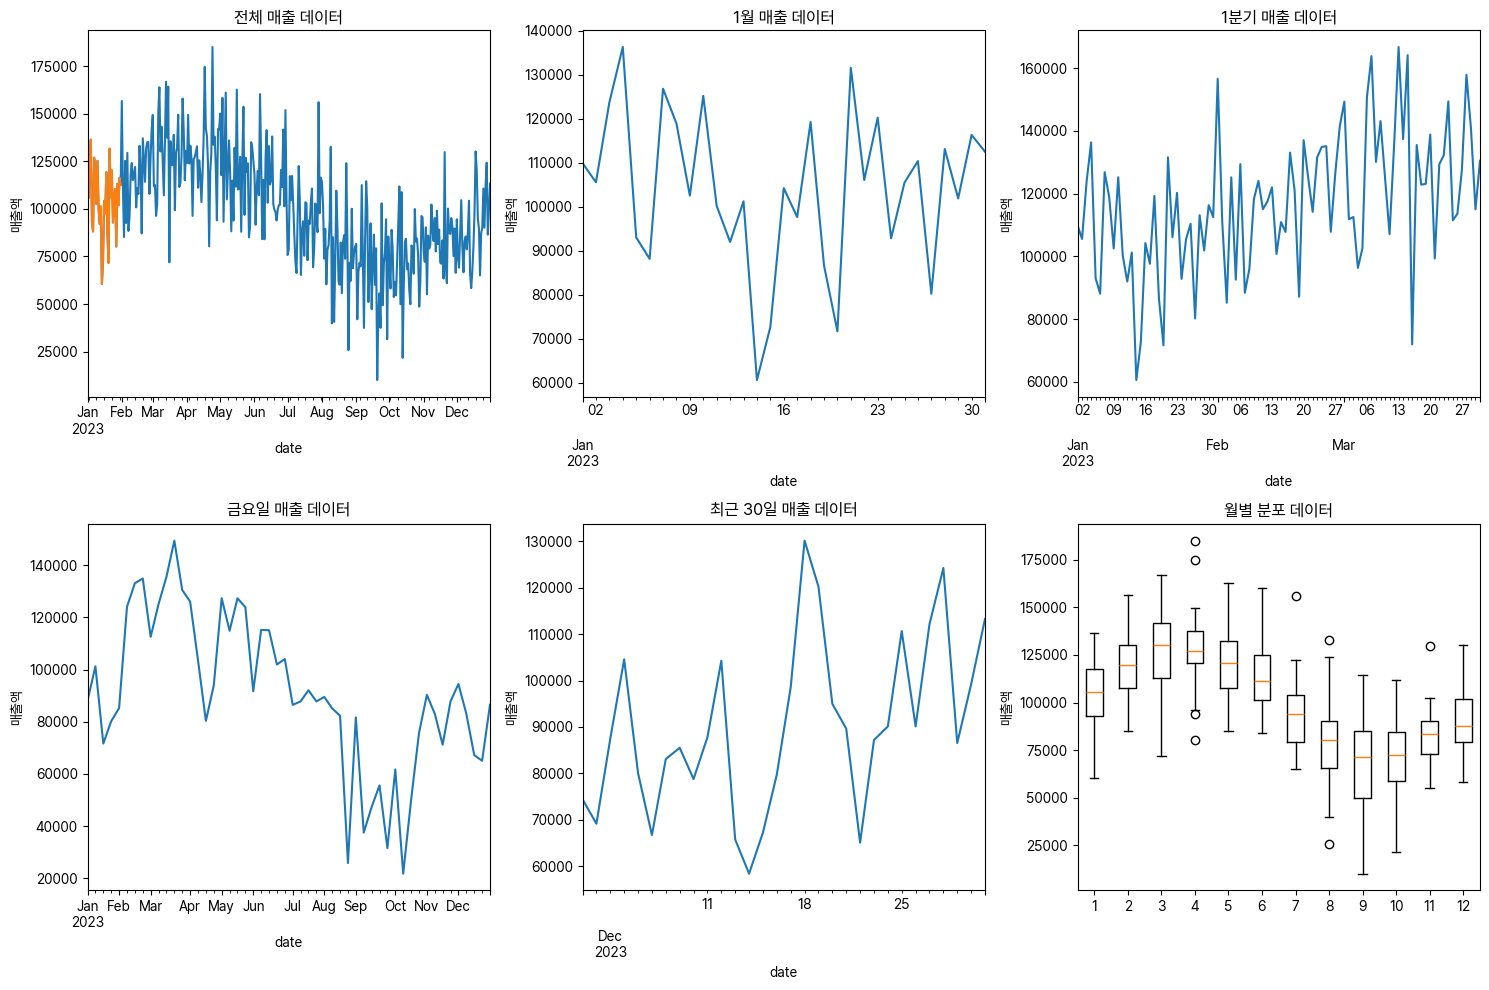

In [88]:
# 시각화

plt.figure(figsize = (15, 10))

# 전체 날짜-매출 데이터
plt.subplot(2, 3, 1)
daily_sales['sales'].plot()
plt.ylabel('매출액')
plt.title('전체 매출 데이터')
plt.xlabel('전체날짜')

# 1월 데이터
jan_data = daily_sales.loc['2023-01']
jan_data['sales'].plot()

# 1월 데이터 서브플롯
plt.subplot(2, 3, 2)
jan_data = daily_sales.loc['2023-01']
jan_data['sales'].plot()
plt.ylabel('매출액')
plt.title('1월 매출 데이터')

# 1Q 데이터
plt.subplot(2, 3, 3)
quarter_1 = daily_sales[daily_sales['quarter'] == 1]
quarter_1['sales'].plot()
plt.ylabel('매출액')
plt.title('1분기 매출 데이터')

# 금요일 매출 추이
plt.subplot(2, 3, 4)
fri_sales = daily_sales[daily_sales['weekname'] == 'Friday']
fri_sales['sales'].plot()
plt.ylabel('매출액')
plt.title('금요일 매출 데이터')

# 최근 30일
plt.subplot(2, 3, 5)
last_30 = daily_sales.tail(30)
last_30['sales'].plot()
plt.ylabel('매출액')
plt.title('최근 30일 매출 데이터')

# 월별 박스 플롯
plt.subplot(2, 3, 6)
all_month = []
for m in range(1, 13):
    all_month.append(daily_sales[daily_sales['month'] == m]['sales'].values)
# all_month = [daily_sales[daily_sales['month'] == m]['sales'].values for m in range(1, 13)]같은 내용
plt.boxplot(all_month)
plt.ylabel('매출액')
plt.title('월별 분포 데이터')

plt.tight_layout()
plt.show()

In [89]:
# 시계열 데이터에서만 가능한 시각화 탐색
# pip install statsmodels

import seaborn as sns

# 시계열 데이터 추세, 계절성 함수
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# 월 기준으로 리샘플링
# 이거는 time_series라 가능
daily_sales.resample('M')['sales'].mean()

/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_46124/1874184003.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_sales.resample('M')['sales'].mean()


date
2023-01-31    104107.064418
2023-02-28    117734.578352
2023-03-31    128912.491972
2023-04-30    128234.072429
2023-05-31    120658.587866
2023-06-30    113914.972247
2023-07-31     95139.246890
2023-08-31     79330.974225
2023-09-30     69078.105530
2023-10-31     73108.426146
2023-11-30     83359.306665
2023-12-31     90306.009649
Freq: ME, Name: sales, dtype: float64

/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_46124/2526633659.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = daily_sales.resample('M')['sales'].mean()
/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_46124/2526633659.py:45: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  daily_pivot = daily_sales.pivot_table(


<function matplotlib.pyplot.show(close=None, block=None)>

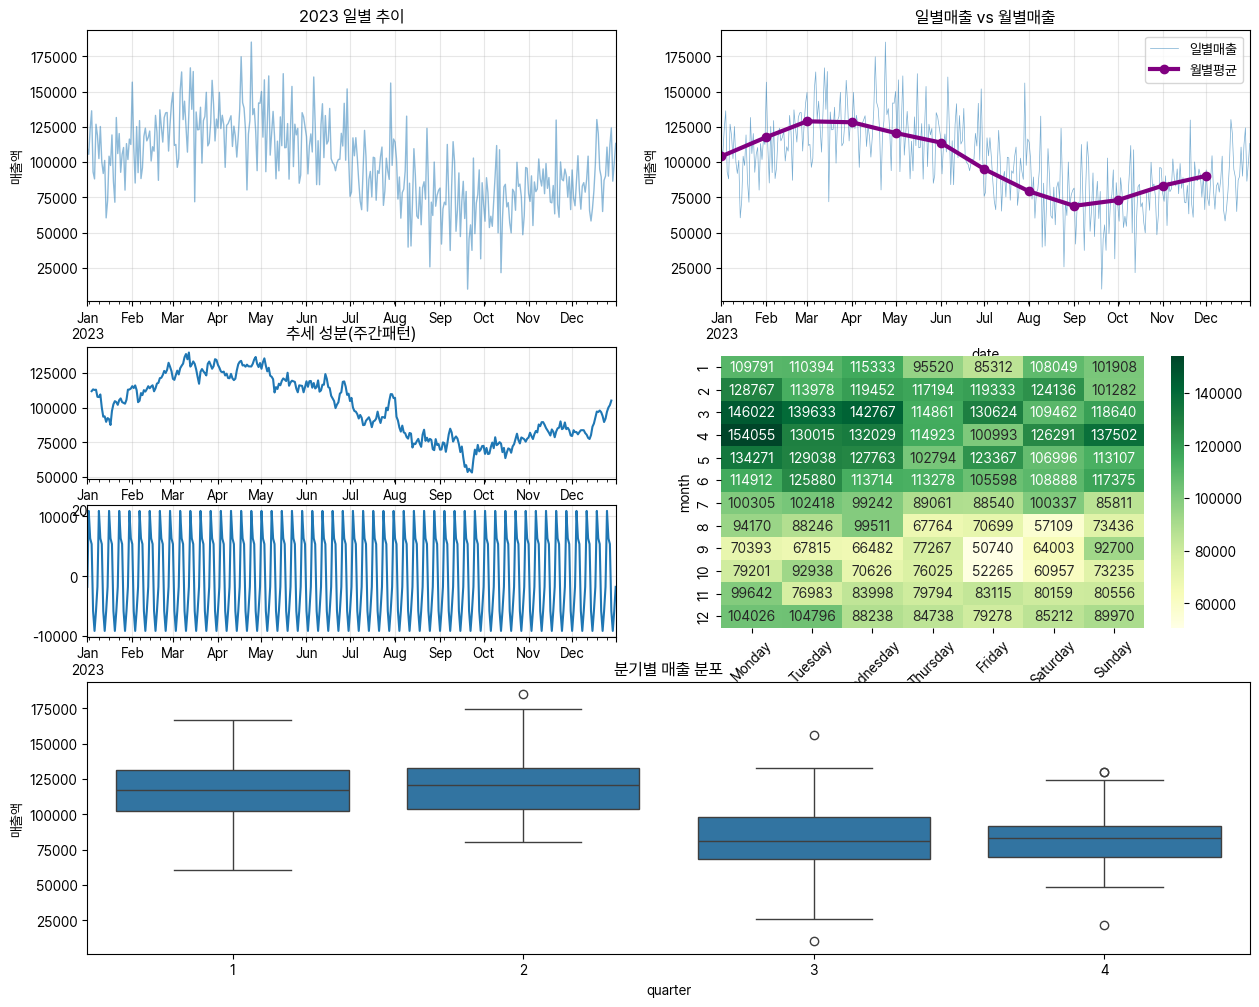

In [143]:
plt.figure(figsize = (15, 12))
plt.subplot(3, 2, 1)
daily_sales['sales'].plot(linewidth=1, alpha = 0.5)
# alpha: 투명도
plt.grid(True, alpha=0.3)   # 보조선
plt.title('2023 일별 추이')
plt.ylabel('매출액')

# 월별 평균
plt.subplot(3, 2, 2)
daily_sales['sales'].plot(linewidth=0.5, alpha=0.6, label='일별매출')
# 일단위를 월단위로 간격 재조정 후 평균내기
monthly_avg = daily_sales.resample('M')['sales'].mean()
monthly_avg.plot(linewidth=3, marker='o', label='월별평균', color='purple')

plt.title('일별매출 vs 월별매출')
plt.ylabel('매출액')
plt.grid(True, alpha = 0.3)
plt.legend()    # 범례라는 뜻.

# 시계열 분해(Seasonal Decomposition)
    # 1. Trend(추세): 전반적인 방향성
    # 2. Seasonal(계절): 주기적으로 반복되는 패턴
    # 3. Residual(잔차): 추세/계절성을 제거한 나머지 요인(갑작스런 이벤트나 노이즈)


# 7일 이동평균으로 트렌드 확인
plt.subplot(6, 2, 5)
decomp = seasonal_decompose(daily_sales['sales'], model='additive', period=7)   # 덧셈모델로 주간패턴을 분석하겠다.
decomp.trend.plot()
plt.title('추세 성분(주간패턴)')
# plt.ylabel('매출액')
plt.grid(True, alpha = 0.3)

# 7일 이동평균으로 계절성 확인
plt.subplot(6, 2, 7)
decomp = seasonal_decompose(daily_sales['sales'], model='additive', period=7)   # 덧셈모델로 주간패턴을 분석하겠다.
decomp.seasonal.plot()
# plt.title('추세 성분(주간패턴)')
# plt.ylabel('매출액')
plt.grid(True, alpha = 0.3)

# 히트맵(월별, 요일별)
plt.subplot(3, 2, 4)
daily_pivot = daily_sales.pivot_table(
    values='sales',
    index='month',
    columns='weekname',
    aggfunc='mean'
)                       # 숫자표시      숫자 형식       색깔
sns.heatmap(daily_pivot, annot=True, fmt='.0f', cmap='YlGn')
plt.xticks(rotation=45)

# 분기별 박스 플롯
plt.subplot(3, 1, 3)
sns.boxplot(x='quarter', y='sales', data=daily_sales) # x, y 축이 일반컬럼이 아닐 때, reset_index를 하는 게 좋을 수도 있음.
plt.title('분기별 매출 분포')
plt.ylabel('매출액')

plt.tight_layout
plt.show

/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_46124/3451769111.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  week_sales = daily_sales.groupby('weekname')['sales'].mean()


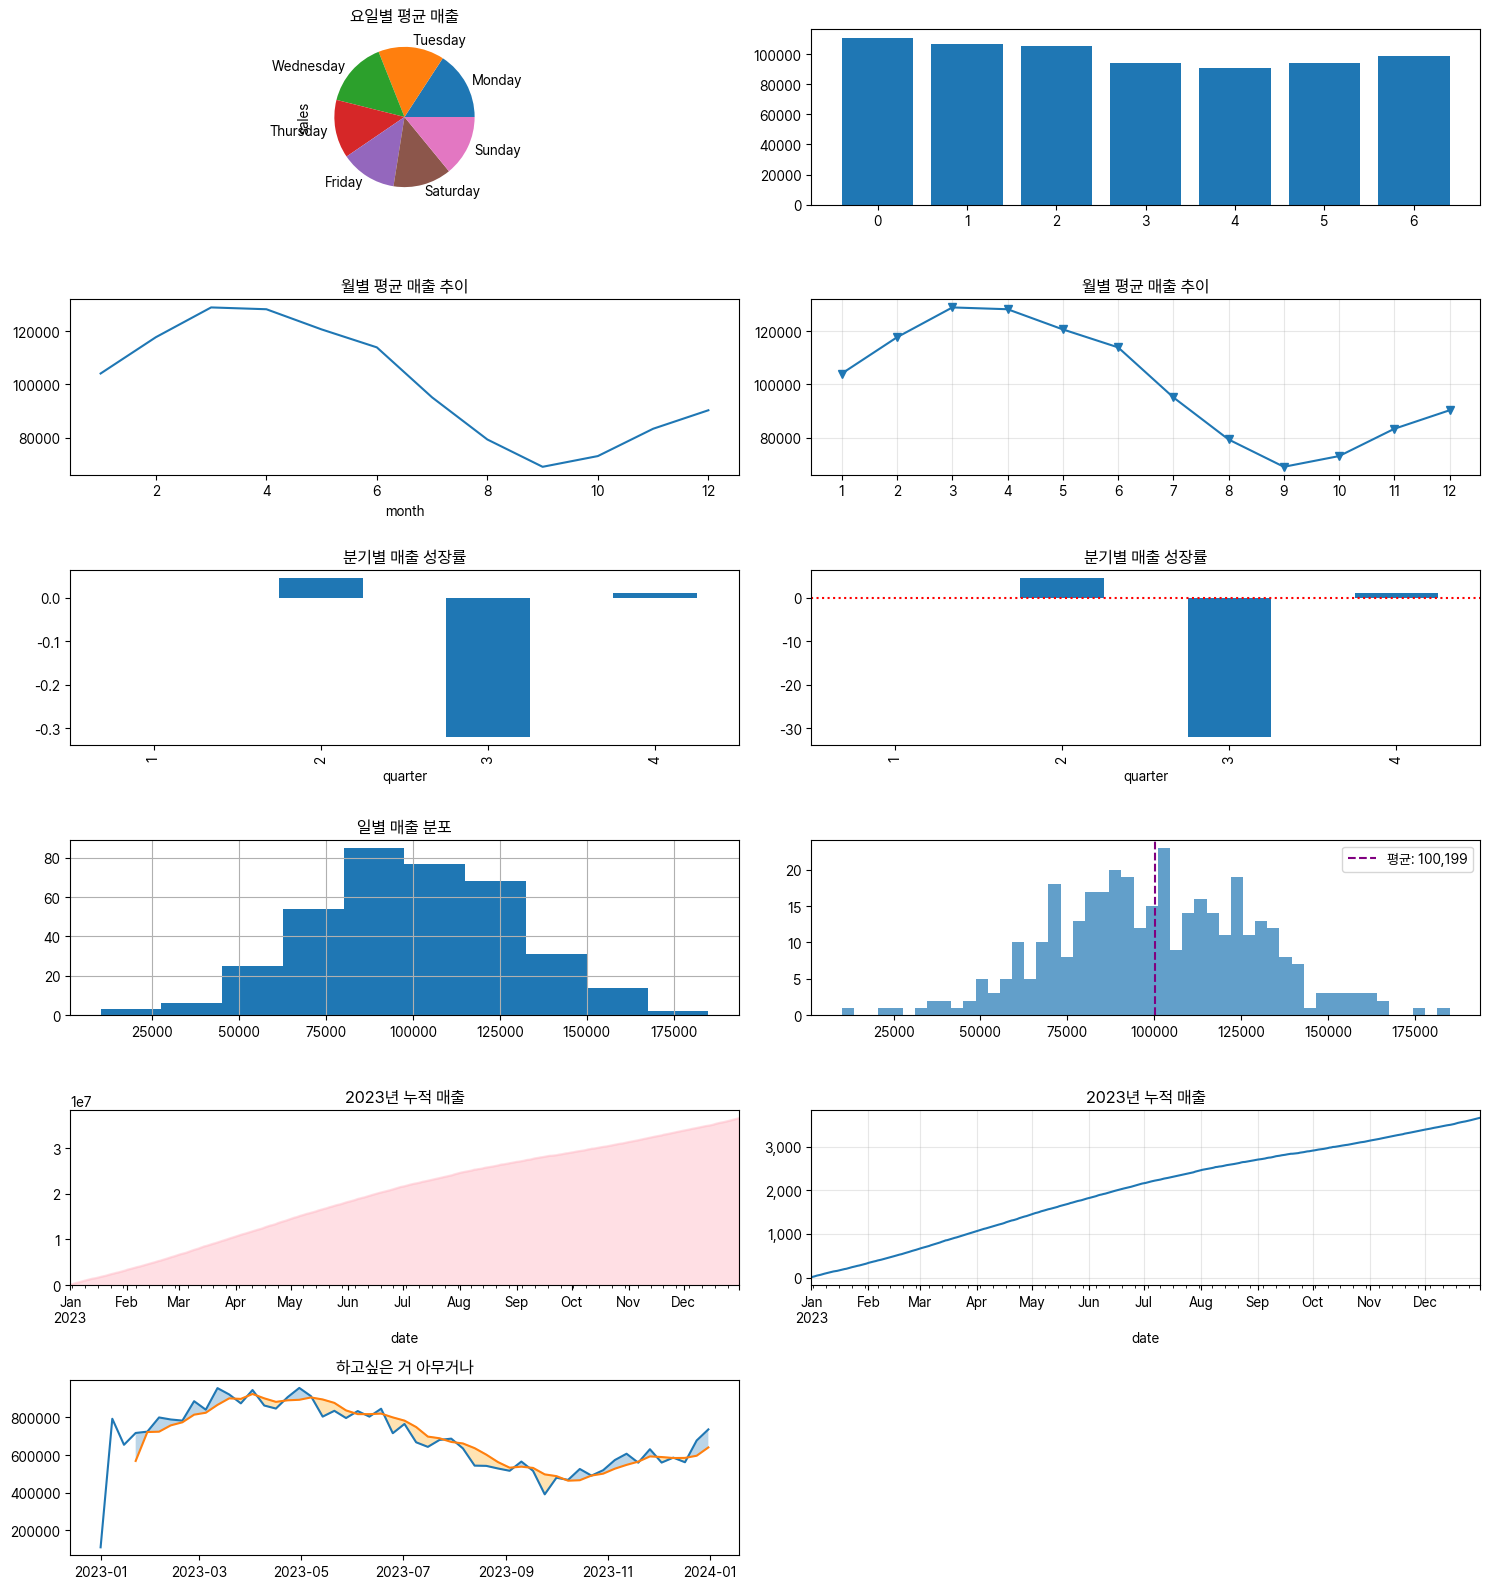

In [ ]:
plt.figure(figsize=(15, 16), constrained_layout=True)

# 주간 패턴(요일별 평균 매출)
plt.subplot(6, 2, 1)
plt.title('요일별 평균 매출')
week_sales = daily_sales.groupby('weekname')['sales'].mean()
week_sales.plot(kind='pie')

# 쌤 답.
plt.subplot(6, 2, 2)
plt.bar(range(7), week_sales.values)

# 월별패턴
plt.subplot(6, 2, 3)
plt.title('월별 평균 매출 추이')
month_sales = daily_sales.groupby('month')['sales'].mean()
month_sales.plot()

# 쌤 답.    # 참고로 월별 데이터는 시계열 데이터가 아님.    # 
plt.subplot(6, 2, 4)
plt.title('월별 평균 매출 추이')
month_sales = daily_sales.groupby('month')['sales'].mean()
plt.plot(month_sales.index, month_sales.values, marker='v')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# .pct_change() # 막대그래프
plt.subplot(6, 2, 5)
plt.title('분기별 매출 성장률')
quarter_sales = daily_sales.groupby('quarter')['sales'].sum()
quarter_growth = quarter_sales.pct_change()
quarter_growth.plot(kind='bar')

# 쌤 답
plt.subplot(6, 2, 6)
plt.title('분기별 매출 성장률')
quarter_sales = daily_sales.groupby('quarter')['sales'].sum()
quarter_growth = quarter_sales.pct_change() * 100
quarter_growth.plot(kind='bar')
plt.axhline(y=0, color='red', linestyle=':')

# 매출 분포 히스토그램
plt.subplot(6, 2, 7)
plt.title('일별 매출 분포')
daily_sales['sales'].hist()

# 쌤 답.
plt.subplot(6, 2, 8)           # 구간     # 투명도
plt.hist(daily_sales['sales'], bins=50, alpha=0.7)
sales_avg = daily_sales['sales'].mean()
# 평균값 세로선
plt.axvline(sales_avg, color='purple', linestyle='--', label=f'평균: {sales_avg:,.0f}')
# 25%랑 75% 세로선도 그릴 수 있겠군.

plt.legend()

# cumsum()
plt.subplot(6, 2, 9)
plt.title('2023년 누적 매출')
dcs = daily_sales['sales'].cumsum()
dcs.plot(kind='area', alpha=0.5, color='Pink')

# 쌤 답.
plt.subplot(6, 2, 10)
plt.title('2023년 누적 매출')
daily_sales['cum_cum'] = daily_sales['sales'].cumsum()
daily_sales['cum_cum'].plot()
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/10000:,.0f}') # 들어온 숫자를 만으로 나누고, , 찍고 소수점 없애기
plt.gca().yaxis.set_major_formatter(formatter)  # gca: get current axis(현재 축을 가져와)
plt.grid(True, alpha=0.3)

# 니 알아 해라
plt.subplot(6, 2, 11)
plt.title('하고싶은 거 아무거나') # 월단위 이상치 분포?
weekly_sales = daily_sales['sales'] \
    .resample('W') \
    .sum()
weekly_sales.name = 'weekly_sales'

# 2) 4주 이동평균 계산
weekly_ma4 = weekly_sales.rolling(window=4).mean()
weekly_ma4.name = 'weekly_ma4'

# 3) 플롯
plt.plot(weekly_sales.index, weekly_sales, label=weekly_sales.name)
plt.plot(weekly_ma4.index,   weekly_ma4,   label=weekly_ma4.name)

# 4) 차이 영역 채우기
plt.fill_between(
    weekly_sales.index,
    weekly_sales,
    weekly_ma4,
    where=weekly_sales >= weekly_ma4,
    interpolate=True,
    alpha=0.3,
    label='매출 ≥ 이동평균'
)
plt.fill_between(
    weekly_sales.index,
    weekly_sales,
    weekly_ma4,
    where=weekly_sales < weekly_ma4,
    interpolate=True,
    alpha=0.3,
    color='orange',
    label='매출 < 이동평균'
)


plt.tight_layout()
plt.show()

/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_46124/2526633659.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = daily_sales.resample('M')['sales'].mean()
/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_46124/2526633659.py:45: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  daily_pivot = daily_sales.pivot_table(


<function matplotlib.pyplot.show(close=None, block=None)>

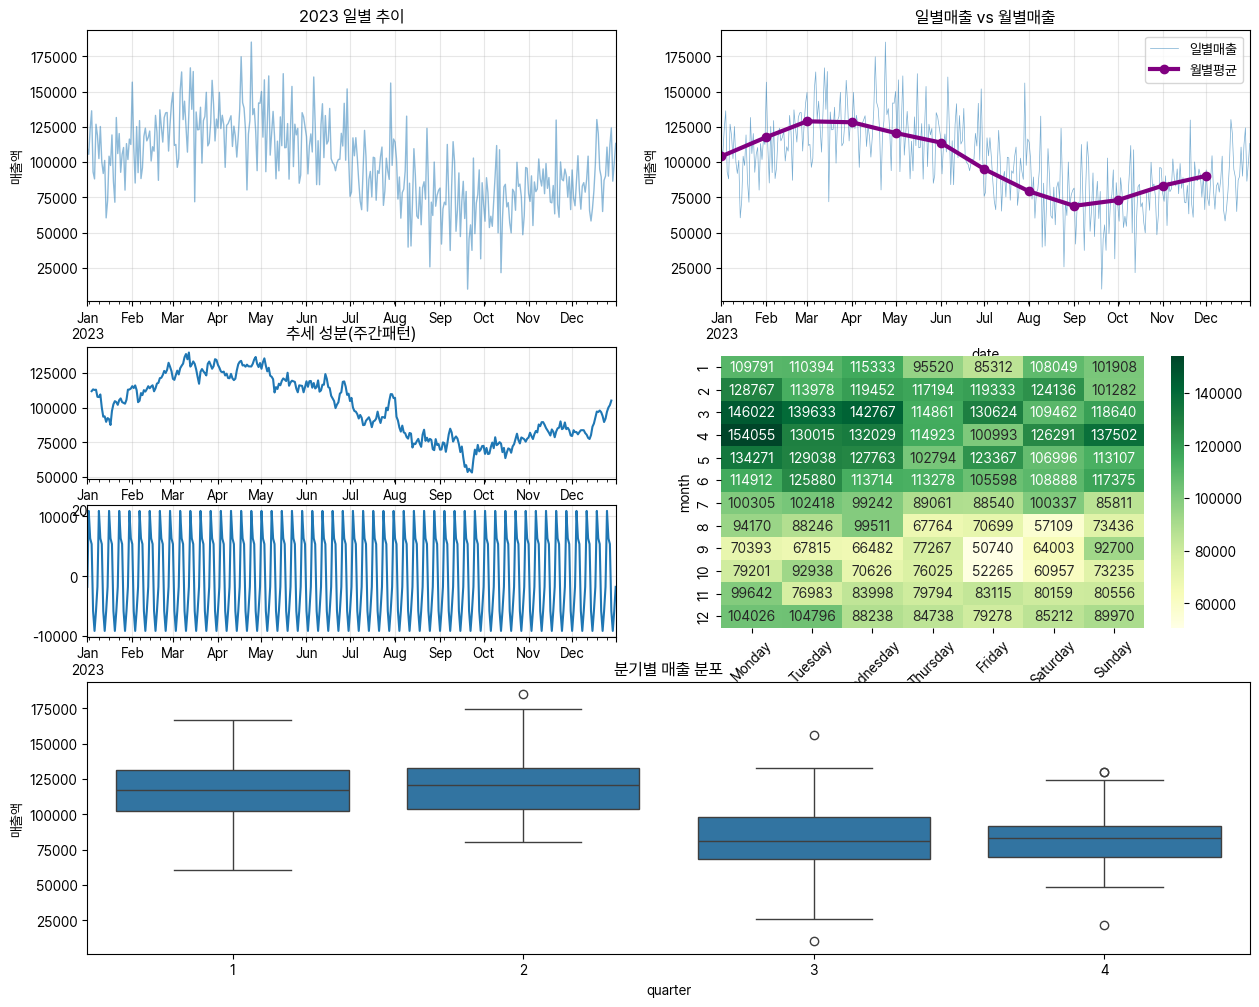

In [ ]:
plt.figure(figsize = (15, 12))
plt.subplot(3, 2, 1)
daily_sales['sales'].plot(linewidth=1, alpha = 0.5)
# alpha: 투명도
plt.grid(True, alpha=0.3)   # 보조선
plt.title('2023 일별 추이')
plt.ylabel('매출액')

# 월별 평균
plt.subplot(3, 2, 2)
daily_sales['sales'].plot(linewidth=0.5, alpha=0.6, label='일별매출')
# 일단위를 월단위로 간격 재조정 후 평균내기
monthly_avg = daily_sales.resample('M')['sales'].mean()
monthly_avg.plot(linewidth=3, marker='o', label='월별평균', color='purple')

plt.title('일별매출 vs 월별매출')
plt.ylabel('매출액')
plt.grid(True, alpha = 0.3)
plt.legend()    # 범례라는 뜻.

# 시계열 분해(Seasonal Decomposition)
    # 1. Trend(추세): 전반적인 방향성
    # 2. Seasonal(계절): 주기적으로 반복되는 패턴
    # 3. Residual(잔차): 추세/계절성을 제거한 나머지 요인(갑작스런 이벤트나 노이즈)


# 7일 이동평균으로 트렌드 확인
plt.subplot(6, 2, 5)
decomp = seasonal_decompose(daily_sales['sales'], model='additive', period=7)   # 덧셈모델로 주간패턴을 분석하겠다.
decomp.trend.plot()
plt.title('추세 성분(주간패턴)')
# plt.ylabel('매출액')
plt.grid(True, alpha = 0.3)

# 7일 이동평균으로 계절성 확인
plt.subplot(6, 2, 7)
decomp = seasonal_decompose(daily_sales['sales'], model='additive', period=7)   # 덧셈모델로 주간패턴을 분석하겠다.
decomp.seasonal.plot()
# plt.title('추세 성분(주간패턴)')
# plt.ylabel('매출액')
plt.grid(True, alpha = 0.3)

# 히트맵(월별, 요일별)
plt.subplot(3, 2, 4)
daily_pivot = daily_sales.pivot_table(
    values='sales',
    index='month',
    columns='weekname',
    aggfunc='mean'
)                       # 숫자표시      숫자 형식       색깔
sns.heatmap(daily_pivot, annot=True, fmt='.0f', cmap='YlGn')
plt.xticks(rotation=45)

# 분기별 박스 플롯
plt.subplot(3, 1, 3)
sns.boxplot(x='quarter', y='sales', data=daily_sales) # x, y 축이 일반컬럼이 아닐 때, reset_index를 하는 게 좋을 수도 있음.
plt.title('분기별 매출 분포')
plt.ylabel('매출액')

plt.tight_layout
plt.show

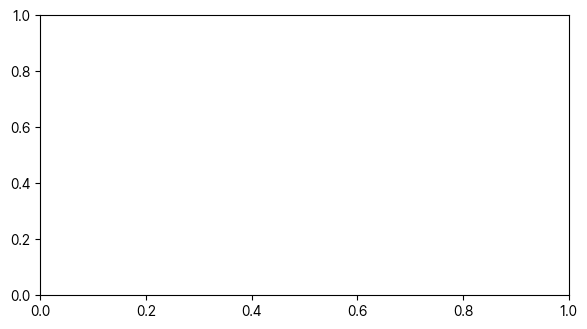

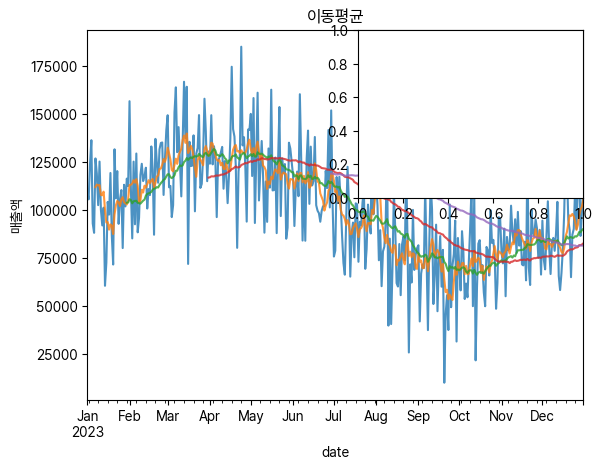

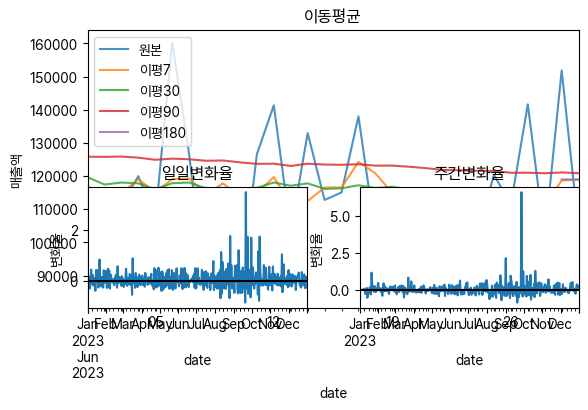

In [254]:
# 시계열 데이터 연산
plt.figure(figsize=(15, 8))

# 이동평균 계산
daily_sales['ma7'] = daily_sales['sales'].rolling(window=7).mean()
daily_sales['ma30'] = daily_sales['sales'].rolling(window=30).mean()
daily_sales['ma90'] = daily_sales['sales'].rolling(window=90).mean()
daily_sales['ma180'] = daily_sales['sales'].rolling(window=180).mean()


# 이동평균 시각화

plt.subplot(2, 2, 1)
daily_sales[['sales', 'ma7', 'ma30', 'ma90', 'ma180']].plot(alpha=0.8)
plt.title('이동평균')
plt.ylabel('매출액')
plt.legend(['원본', '이평7', '이평30', '이평90', '이평180'])

# 특정 기간 확대(6월)

plt.subplot(2, 2, 2)
daily_sales.loc[daily_sales['month'] == 6][['sales', 'ma7', 'ma30', 'ma90', 'ma180']].plot(alpha=0.8)
plt.title('이동평균')
plt.ylabel('매출액')
plt.legend(['원본', '이평7', '이평30', '이평90', '이평180'])

# 변화율 계산
daily_sales['daily_change'] = daily_sales['sales'].pct_change()
daily_sales['weekly_change'] = daily_sales['sales'].pct_change(periods=7) # 주간 변화율
plt.subplot(2, 2, 3)
daily_sales['daily_change'].plot()
plt.title('일일변화율')
plt.ylabel('변화율')
plt.axhline(y=0, color='black')

plt.subplot(2, 2, 4)
daily_sales['weekly_change'].plot()
plt.title('주간변화율')
plt.ylabel('변화율')
plt.axhline(y=0, color='black')

plt.tight_layout()
plt.show()

In [257]:
# 리샘플링(원하는 주기로 나눠준다)
# 주간 매출 총합
wsales = daily_sales['sales'].resample('W').sum().agg([
    'sum', 'mean', 'min', 'max', 'std'
])

print(weekly_sales)
weekly_sales.plt()

# 월간 매출 총합
m_sales = daily_sales['sales'].resample('ME').sum()   # 월 마지막 날 기준

# 분기 매출 총합
q_sales = daily_sales['sales'].resample('QE').sum()   # 월 마지막 날 기준()

date
2023-01-01    109934.283060
2023-01-08    792656.174213
2023-01-15    654458.234884
2023-01-22    717168.981301
2023-01-29    724226.455078
2023-02-05    799639.564093
2023-02-12    788793.516512
2023-02-19    782911.168433
2023-02-26    885936.527228
2023-03-05    840837.996950
2023-03-12    955417.136581
2023-03-19    921831.348974
2023-03-26    874472.252302
2023-04-02    945379.715568
2023-04-09    862977.439620
2023-04-16    846835.667076
2023-04-23    907330.602611
2023-04-30    956389.550351
2023-05-07    912688.629377
2023-05-14    804070.030790
2023-05-21    834790.921635
2023-05-28    796505.036459
2023-06-04    833532.260002
2023-06-11    803971.993657
2023-06-18    846023.476975
2023-06-25    715905.882151
2023-07-02    765030.607423
2023-07-09    667598.262354
2023-07-16    643328.980086
2023-07-23    680215.004064
2023-07-30    687126.117481
2023-08-06    635191.411140
2023-08-13    543777.126328
2023-08-20    542432.679035
2023-08-27    528538.491396
2023-09-03    5

AttributeError: 'Series' object has no attribute 'plt'